<a href="https://colab.research.google.com/github/Thevaibhavraina/SPIT-LAB/blob/Machine-learning/ML_ISE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [28]:
df=pd.read_csv("creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [29]:
df.shape

(284807, 31)

Data contains 31 attributes which are linear combination of several variables, which aren't provided because of privacy terms. And it contains 284807 records.


In [30]:
#checking null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data does not contain any missing value.<br>
let's proceed to some visualization

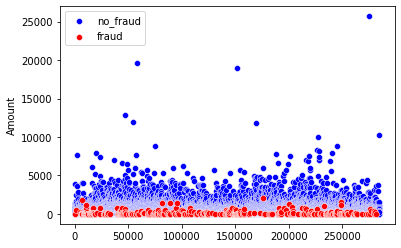

In [31]:
#dividing dataframes into two dataframes on the bases of fraud cases and non fraud cases.
fraud=df[df['Class']==1]
no_fraud=df[df['Class']==0]

#plotting Amount attribute as scatterplot
sns.scatterplot(data=no_fraud['Amount'],color='blue')
sns.scatterplot(data=fraud['Amount'],color='red')
plt.legend(['no_fraud','fraud'])

It is clearly seen that all the fraud transactions are of below 5000 unit.<br>

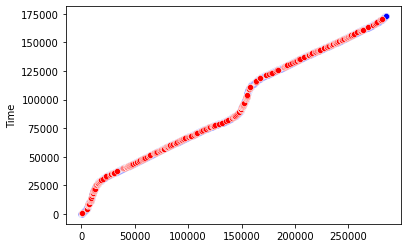

In [32]:
#Plotting time attrbute to check if there's some relation.
sns.scatterplot(data=no_fraud.Time,color='blue')
sns.scatterplot(data=fraud.Time,color='red')

There's no specific period which shows most fraud cases.

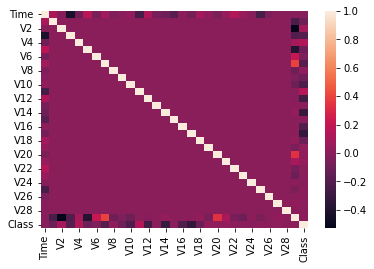

In [33]:
#Plotting heatmap to show correlation between attributes
sns.heatmap(df.corr())

linear combinations v1,v2,...,v28 are not highly correlated to one another.
there's still good correlation between class and several LC namely v7,v20,etc.

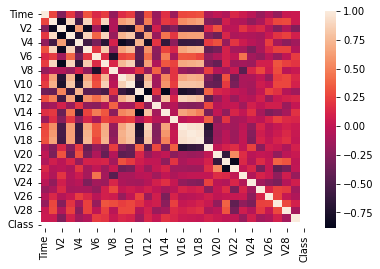

In [34]:
#Plotting heatmap to show correlation between attributes for fraud cases only
sns.heatmap(fraud.corr())

It is surprising that the attributes have good correlations in fraud cases.<br>
We are provided with only linear combinations to hide the real attributes because of privacy policy, ow we could have get some great relation between them. We could still have that but it's not gonna add something as we don't know what they are.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


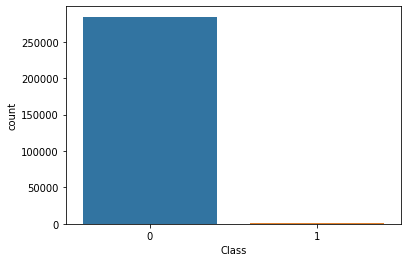

In [35]:
#Countplot to check counts of number of fraud cases and non-fraud cases in our dataset
sns.countplot(df['Class'])

In [36]:
#Percentage proportion of fraud class and non-fraud class
print("Fraud Cases in our data set : ",len(fraud)*100/len(df)," %")
print("Non Fraud Cases in our data set : ",len(no_fraud)*100/len(df)," %")

Fraud Cases in our data set :  0.1727485630620034  %
Non Fraud Cases in our data set :  99.827251436938  %


Dataset is highly unbalanced. It contains 99.8% non-fraud cases and only 0.2% of fraud cases. Using this dataset only to train our model would be highly bias towards non-fraud cases.<br>
To deal with this we can use over sampling methods or under sampling methods.<br>
Here, I am using SMOTE which stands for Synthetic Minority Oversampling Technique.
(one can also use ADASYN or Random Over Sampling depending on the dataset and choice)

In [37]:
#Dividing into feature set and target set.
x=df.drop('Class',axis=1)
y=df['Class']

#importing SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=60)
x_smote,y_smote=smote.fit_resample(x,y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


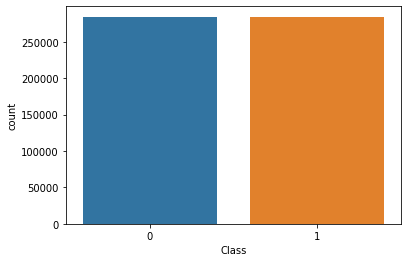

In [38]:
sns.countplot(y_smote)

Now we can see after applying SMOTE, data is no more bias towards any case. Both are 50-50.

In [39]:
#splitting data we get after applying SMOTE
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.3,random_state=1)

In [42]:
from sklearn.pipeline import make_pipeline
rf=make_pipeline(StandardScaler(),RandomForestClassifier())
rf.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [43]:
yhat=rf.predict(x_test)

In [44]:
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85411
           1       1.00      1.00      1.00     85178

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



roc_auc_score :  0.9998884848669013


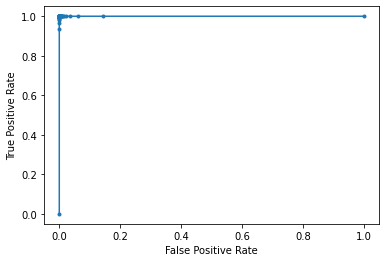

In [45]:
#plotting roc_auc_curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("roc_auc_score : ",roc_auc_score(yhat,y_test))

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’.<br>
The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.<br>
The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.<br>
We can see that AUC is approx to its max, which shows that the performance of this model is great. Model classifies with minimum False positive rate and max true positive rate



Precision score :  0.9999882575357264
Recall score :  0.999788677827608


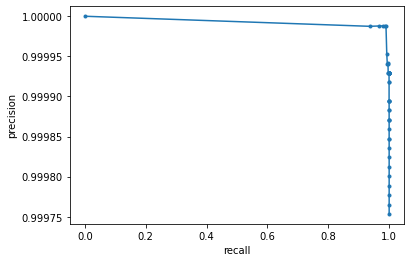

In [46]:
#plotting precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score,recall_score
precision,recall,_ = precision_recall_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.plot(recall,precision,marker='.')
plt.xlabel('recall')
plt.ylabel('precision')
print("Precision score : ",precision_score(yhat,y_test,average='binary'))
print("Recall score : ",recall_score(yhat,y_test,average='binary'))

Precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

In this model, the area under the precision-recall curve tends to its highest, which shows that our classifying with accurately results with majority of positive results.

We have build a Classifier using Random Forest Classifier which could detect credit card fraud case with Precision and recall 1 and with roc_auc_score 99% .<br>
